<h1> <center> Paper Reproduction - "A Representational Similarity Analysis of the Dynamics of Object Processing Using Single-Trial EEG Classification" (Using Deep Learning) </h1> </center>

## Introduction
Work in this notebook is based on ["A Representational Similarity Analysis of the Dynamics of Object Processing Using Single- Trial EEG Classification"](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0135697).

The recognition of object categories is effortlessly accomplished in everyday life, yet its neural underpinnings remain not fully understood.
As a part of a project for a course in Machine Learning for Data Mining, we performed single-trial classification to perform a Representational Similarity Analysis (RSA) of categorical representation of objects in human visual cortex using EEG [$^1$](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0135697).

The work done in this notebook is aimed at reproducing a fraction of the results in ["A Representational Similarity Analysis of the Dynamics of Object Processing Using Single- Trial EEG Classification"](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0135697) using deep learning techniques instead of LDA and SVM-RBF that are proposed in the paper. 

## Data
- Brain responses were recorded while participants viewed a set of 72 photographs of objects with a planned category structure.
- Data (X_3D): 124(channels or features) x 32 (time points) x 5188(trials)
- Classification Labels: 1 x 5188 (trials)

## General problem statement
Analyse how the human brain responds to various inputs from the vision cortex, using EEG data.

## Method
1. Performed binary classification using artificial neural networks to identify whether the stimulus is a human face or an inanimate object at each time step.
2. Performed multiclass classification (6 classes - ...) using artificial neural networks at each time step.

## Conclusions:
- The data analysis revealed that brain responses to images of human faces formed the most distinct category while responses to images from the two inanimate categories formed a single category cluster.

## Dual class classification b/w human faces and inanimate objects

### Importing Libraries

In [1]:
import scipy.io
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from keras.utils import np_utils
from imutils import build_montages
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Using TensorFlow backend.


### Data preprocessing

In [ ]:
#reading EEG data
mat = scipy.io.loadmat('S1.mat')

X = mat['X_3D']
Y = mat['categoryLabels']

#print X.shape, y.shape
Y = Y.transpose()
X = X.transpose(1, 2, 0)
# print X.shape, Y.shape  # X: (32 - time , 5188, 124 - channels)
# print y

### PCA and classification of data (5188x124) at each time stamp

In [14]:
accuracies = []

pca = PCA(0.95)

for j in range(X.shape[0]):
    pca.fit(X[j,:,:])
    X_mod = pca.transform(X[j,:,:])
#     print (X_mod.shape) (5188, 32)
    data_X = []
    data_Y = []
    
    for i in range(X.shape[1]):
        #print Y[i,0]
        if Y[i,0]==2 or Y[i,0]==6 :
            data_X.append(X[j,i,:])
            if Y[i,0]==2:
                data_Y.append(0)
            else:
                data_Y.append(1)
    
    sz = len(data_Y)
    data_X = np.array(data_X, dtype=np.float64)
    data_Y = np.array(data_Y, dtype=np.int64).reshape((sz,1))
    # print data_Y.shape
    
    x_train, x_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size=0.2)

    trainY = np_utils.to_categorical(Y_train, 2)
    testY = np_utils.to_categorical(Y_test, 2)

    model=Sequential()
    model.add(Dense(64,input_shape=(124,),activation='relu'))
    model.add(Dense(64,input_shape=(124,),activation='relu'))
    model.add(Dense(2,activation='softmax'))
    model.summary()

    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['categorical_accuracy'])
    history=model.fit(x_train,trainY,batch_size=64,epochs=20,verbose=1,validation_data=(x_test,testY))
    scores=model.evaluate(x_test,testY)

    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

    accuracies.append(scores[1]*100)

Model: "sequential_101"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_303 (Dense)            (None, 64)                8000      
_________________________________________________________________
dense_304 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_305 (Dense)            (None, 2)                 130       
Total params: 12,290
Trainable params: 12,290
Non-trainable params: 0
_________________________________________________________________
Train on 1382 samples, validate on 346 samples
Epoch 1/20
1382/1382 [==============================] - 2s 1ms/sample - loss: 0.6950 - categorical_accuracy: 0.5195 - val_loss: 0.6908 - val_categorical_accuracy: 0.5318
Epoch 2/20
1382/1382 [==============================] - 0s 145us/sample - loss: 0.6870 - categorical_accuracy: 0.5716 - val_loss: 0.6921 - val_categorical_accura

categorical_accuracy: 53.47%
Model: "sequential_102"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_306 (Dense)            (None, 64)                8000      
_________________________________________________________________
dense_307 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_308 (Dense)            (None, 2)                 130       
Total params: 12,290
Trainable params: 12,290
Non-trainable params: 0
_________________________________________________________________
Train on 1382 samples, validate on 346 samples
Epoch 1/20
1382/1382 [==============================] - 2s 1ms/sample - loss: 0.7027 - categorical_accuracy: 0.4899 - val_loss: 0.6944 - val_categorical_accuracy: 0.5231
Epoch 2/20
1382/1382 [==============================] - 0s 249us/sample - loss: 0.6844 - categorical_accuracy: 0.5543 - val_loss: 0.

categorical_accuracy: 48.55%
Model: "sequential_103"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_309 (Dense)            (None, 64)                8000      
_________________________________________________________________
dense_310 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_311 (Dense)            (None, 2)                 130       
Total params: 12,290
Trainable params: 12,290
Non-trainable params: 0
_________________________________________________________________
Train on 1382 samples, validate on 346 samples
Epoch 1/20
1382/1382 [==============================] - 2s 1ms/sample - loss: 0.6979 - categorical_accuracy: 0.4834 - val_loss: 0.6964 - val_categorical_accuracy: 0.4595
Epoch 2/20
1382/1382 [==============================] - 0s 76us/sample - loss: 0.6847 - categorical_accuracy: 0.5586 - val_loss: 0.6

categorical_accuracy: 49.42%
Model: "sequential_104"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_312 (Dense)            (None, 64)                8000      
_________________________________________________________________
dense_313 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_314 (Dense)            (None, 2)                 130       
Total params: 12,290
Trainable params: 12,290
Non-trainable params: 0
_________________________________________________________________
Train on 1382 samples, validate on 346 samples
Epoch 1/20
1382/1382 [==============================] - 2s 1ms/sample - loss: 0.6946 - categorical_accuracy: 0.5029 - val_loss: 0.6938 - val_categorical_accuracy: 0.5260
Epoch 2/20
1382/1382 [==============================] - 0s 83us/sample - loss: 0.6855 - categorical_accuracy: 0.5463 - val_loss: 0.6

categorical_accuracy: 49.42%
Model: "sequential_105"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_315 (Dense)            (None, 64)                8000      
_________________________________________________________________
dense_316 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_317 (Dense)            (None, 2)                 130       
Total params: 12,290
Trainable params: 12,290
Non-trainable params: 0
_________________________________________________________________
Train on 1382 samples, validate on 346 samples
Epoch 1/20
1382/1382 [==============================] - 2s 1ms/sample - loss: 0.7000 - categorical_accuracy: 0.4920 - val_loss: 0.6896 - val_categorical_accuracy: 0.5318
Epoch 2/20
1382/1382 [==============================] - 0s 128us/sample - loss: 0.6878 - categorical_accuracy: 0.5326 - val_loss: 0.

categorical_accuracy: 49.71%
Model: "sequential_106"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_318 (Dense)            (None, 64)                8000      
_________________________________________________________________
dense_319 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_320 (Dense)            (None, 2)                 130       
Total params: 12,290
Trainable params: 12,290
Non-trainable params: 0
_________________________________________________________________
Train on 1382 samples, validate on 346 samples
Epoch 1/20
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.6955 - categorical_accuracy: 0.5065 - val_loss: 0.6904 - val_categorical_accuracy: 0.5173
Epoch 2/20
1382/1382 [==============================] - 0s 106us/sample - loss: 0.6819 - categorical_accuracy: 0.5658 - val_loss: 0.

categorical_accuracy: 51.73%
Model: "sequential_107"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_321 (Dense)            (None, 64)                8000      
_________________________________________________________________
dense_322 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_323 (Dense)            (None, 2)                 130       
Total params: 12,290
Trainable params: 12,290
Non-trainable params: 0
_________________________________________________________________
Train on 1382 samples, validate on 346 samples
Epoch 1/20
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.6937 - categorical_accuracy: 0.5123 - val_loss: 0.6897 - val_categorical_accuracy: 0.5405
Epoch 2/20
1382/1382 [==============================] - 0s 105us/sample - loss: 0.6826 - categorical_accuracy: 0.5579 - val_loss: 0.

categorical_accuracy: 53.76%
Model: "sequential_108"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_324 (Dense)            (None, 64)                8000      
_________________________________________________________________
dense_325 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_326 (Dense)            (None, 2)                 130       
Total params: 12,290
Trainable params: 12,290
Non-trainable params: 0
_________________________________________________________________
Train on 1382 samples, validate on 346 samples
Epoch 1/20
1382/1382 [==============================] - 2s 2ms/sample - loss: 0.6946 - categorical_accuracy: 0.5188 - val_loss: 0.6963 - val_categorical_accuracy: 0.4884
Epoch 2/20
1382/1382 [==============================] - 0s 84us/sample - loss: 0.6804 - categorical_accuracy: 0.5738 - val_loss: 0.6

categorical_accuracy: 50.29%
Model: "sequential_109"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_327 (Dense)            (None, 64)                8000      
_________________________________________________________________
dense_328 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_329 (Dense)            (None, 2)                 130       
Total params: 12,290
Trainable params: 12,290
Non-trainable params: 0
_________________________________________________________________
Train on 1382 samples, validate on 346 samples
Epoch 1/20
1382/1382 [==============================] - 2s 1ms/sample - loss: 0.6948 - categorical_accuracy: 0.5152 - val_loss: 0.6920 - val_categorical_accuracy: 0.5087
Epoch 2/20
1382/1382 [==============================] - 0s 111us/sample - loss: 0.6835 - categorical_accuracy: 0.5615 - val_loss: 0.

categorical_accuracy: 54.91%
Model: "sequential_110"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_330 (Dense)            (None, 64)                8000      
_________________________________________________________________
dense_331 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_332 (Dense)            (None, 2)                 130       
Total params: 12,290
Trainable params: 12,290
Non-trainable params: 0
_________________________________________________________________
Train on 1382 samples, validate on 346 samples
Epoch 1/20
1382/1382 [==============================] - 1s 912us/sample - loss: 0.6832 - categorical_accuracy: 0.5535 - val_loss: 0.6727 - val_categorical_accuracy: 0.5694
Epoch 2/20
1382/1382 [==============================] - 0s 62us/sample - loss: 0.6618 - categorical_accuracy: 0.5883 - val_loss: 0

categorical_accuracy: 58.96%
Model: "sequential_111"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_333 (Dense)            (None, 64)                8000      
_________________________________________________________________
dense_334 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_335 (Dense)            (None, 2)                 130       
Total params: 12,290
Trainable params: 12,290
Non-trainable params: 0
_________________________________________________________________
Train on 1382 samples, validate on 346 samples
Epoch 1/20
1382/1382 [==============================] - 1s 899us/sample - loss: 0.6618 - categorical_accuracy: 0.6078 - val_loss: 0.6624 - val_categorical_accuracy: 0.6214
Epoch 2/20
1382/1382 [==============================] - 0s 76us/sample - loss: 0.6277 - categorical_accuracy: 0.6404 - val_loss: 0

categorical_accuracy: 59.54%
Model: "sequential_112"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_336 (Dense)            (None, 64)                8000      
_________________________________________________________________
dense_337 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_338 (Dense)            (None, 2)                 130       
Total params: 12,290
Trainable params: 12,290
Non-trainable params: 0
_________________________________________________________________
Train on 1382 samples, validate on 346 samples
Epoch 1/20
1382/1382 [==============================] - 1s 789us/sample - loss: 0.6905 - categorical_accuracy: 0.5362 - val_loss: 0.6811 - val_categorical_accuracy: 0.5838
Epoch 2/20
1382/1382 [==============================] - 0s 73us/sample - loss: 0.6694 - categorical_accuracy: 0.6093 - val_loss: 0

categorical_accuracy: 68.21%
Model: "sequential_113"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_339 (Dense)            (None, 64)                8000      
_________________________________________________________________
dense_340 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_341 (Dense)            (None, 2)                 130       
Total params: 12,290
Trainable params: 12,290
Non-trainable params: 0
_________________________________________________________________
Train on 1382 samples, validate on 346 samples
Epoch 1/20
1382/1382 [==============================] - 1s 735us/sample - loss: 0.6803 - categorical_accuracy: 0.5702 - val_loss: 0.6695 - val_categorical_accuracy: 0.5751
Epoch 2/20
1382/1382 [==============================] - 0s 87us/sample - loss: 0.6571 - categorical_accuracy: 0.6201 - val_loss: 0

categorical_accuracy: 67.63%
Model: "sequential_114"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_342 (Dense)            (None, 64)                8000      
_________________________________________________________________
dense_343 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_344 (Dense)            (None, 2)                 130       
Total params: 12,290
Trainable params: 12,290
Non-trainable params: 0
_________________________________________________________________
Train on 1382 samples, validate on 346 samples
Epoch 1/20
1382/1382 [==============================] - 2s 2ms/sample - loss: 0.6795 - categorical_accuracy: 0.5738 - val_loss: 0.6704 - val_categorical_accuracy: 0.6214
Epoch 2/20
1382/1382 [==============================] - 0s 83us/sample - loss: 0.6561 - categorical_accuracy: 0.6136 - val_loss: 0.6

categorical_accuracy: 61.85%
Model: "sequential_115"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_345 (Dense)            (None, 64)                8000      
_________________________________________________________________
dense_346 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_347 (Dense)            (None, 2)                 130       
Total params: 12,290
Trainable params: 12,290
Non-trainable params: 0
_________________________________________________________________
Train on 1382 samples, validate on 346 samples
Epoch 1/20
1382/1382 [==============================] - 1s 699us/sample - loss: 0.6836 - categorical_accuracy: 0.5644 - val_loss: 0.6671 - val_categorical_accuracy: 0.6156
Epoch 2/20
1382/1382 [==============================] - 0s 68us/sample - loss: 0.6616 - categorical_accuracy: 0.6151 - val_loss: 0

categorical_accuracy: 54.62%
Model: "sequential_116"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_348 (Dense)            (None, 64)                8000      
_________________________________________________________________
dense_349 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_350 (Dense)            (None, 2)                 130       
Total params: 12,290
Trainable params: 12,290
Non-trainable params: 0
_________________________________________________________________
Train on 1382 samples, validate on 346 samples
Epoch 1/20
1382/1382 [==============================] - 1s 954us/sample - loss: 0.6963 - categorical_accuracy: 0.5000 - val_loss: 0.6795 - val_categorical_accuracy: 0.5202
Epoch 2/20
1382/1382 [==============================] - 0s 83us/sample - loss: 0.6735 - categorical_accuracy: 0.5890 - val_loss: 0

categorical_accuracy: 62.14%
Model: "sequential_117"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_351 (Dense)            (None, 64)                8000      
_________________________________________________________________
dense_352 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_353 (Dense)            (None, 2)                 130       
Total params: 12,290
Trainable params: 12,290
Non-trainable params: 0
_________________________________________________________________
Train on 1382 samples, validate on 346 samples
Epoch 1/20
1382/1382 [==============================] - 1s 770us/sample - loss: 0.6926 - categorical_accuracy: 0.4949 - val_loss: 0.6810 - val_categorical_accuracy: 0.5578
Epoch 2/20
1382/1382 [==============================] - 0s 85us/sample - loss: 0.6704 - categorical_accuracy: 0.5955 - val_loss: 0

categorical_accuracy: 64.45%
Model: "sequential_118"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_354 (Dense)            (None, 64)                8000      
_________________________________________________________________
dense_355 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_356 (Dense)            (None, 2)                 130       
Total params: 12,290
Trainable params: 12,290
Non-trainable params: 0
_________________________________________________________________
Train on 1382 samples, validate on 346 samples
Epoch 1/20
1382/1382 [==============================] - 1s 988us/sample - loss: 0.6893 - categorical_accuracy: 0.5318 - val_loss: 0.6747 - val_categorical_accuracy: 0.5983
Epoch 2/20
1382/1382 [==============================] - 0s 99us/sample - loss: 0.6687 - categorical_accuracy: 0.6006 - val_loss: 0

categorical_accuracy: 64.45%
Model: "sequential_119"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_357 (Dense)            (None, 64)                8000      
_________________________________________________________________
dense_358 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_359 (Dense)            (None, 2)                 130       
Total params: 12,290
Trainable params: 12,290
Non-trainable params: 0
_________________________________________________________________
Train on 1382 samples, validate on 346 samples
Epoch 1/20
1382/1382 [==============================] - 1s 859us/sample - loss: 0.6858 - categorical_accuracy: 0.5637 - val_loss: 0.6750 - val_categorical_accuracy: 0.5809
Epoch 2/20
1382/1382 [==============================] - 0s 98us/sample - loss: 0.6624 - categorical_accuracy: 0.6042 - val_loss: 0

categorical_accuracy: 64.74%
Model: "sequential_120"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_360 (Dense)            (None, 64)                8000      
_________________________________________________________________
dense_361 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_362 (Dense)            (None, 2)                 130       
Total params: 12,290
Trainable params: 12,290
Non-trainable params: 0
_________________________________________________________________
Train on 1382 samples, validate on 346 samples
Epoch 1/20
1382/1382 [==============================] - 1s 831us/sample - loss: 0.6891 - categorical_accuracy: 0.5297 - val_loss: 0.6857 - val_categorical_accuracy: 0.5780
Epoch 2/20
1382/1382 [==============================] - 0s 97us/sample - loss: 0.6719 - categorical_accuracy: 0.5861 - val_loss: 0

categorical_accuracy: 62.43%
Model: "sequential_121"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_363 (Dense)            (None, 64)                8000      
_________________________________________________________________
dense_364 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_365 (Dense)            (None, 2)                 130       
Total params: 12,290
Trainable params: 12,290
Non-trainable params: 0
_________________________________________________________________
Train on 1382 samples, validate on 346 samples
Epoch 1/20
1382/1382 [==============================] - 2s 1ms/sample - loss: 0.6863 - categorical_accuracy: 0.5579 - val_loss: 0.6833 - val_categorical_accuracy: 0.5376
Epoch 2/20
1382/1382 [==============================] - 0s 71us/sample - loss: 0.6677 - categorical_accuracy: 0.5897 - val_loss: 0.6

categorical_accuracy: 58.09%
Model: "sequential_122"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_366 (Dense)            (None, 64)                8000      
_________________________________________________________________
dense_367 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_368 (Dense)            (None, 2)                 130       
Total params: 12,290
Trainable params: 12,290
Non-trainable params: 0
_________________________________________________________________
Train on 1382 samples, validate on 346 samples
Epoch 1/20
1382/1382 [==============================] - 2s 2ms/sample - loss: 0.6937 - categorical_accuracy: 0.5239 - val_loss: 0.6922 - val_categorical_accuracy: 0.5462
Epoch 2/20
1382/1382 [==============================] - 0s 88us/sample - loss: 0.6800 - categorical_accuracy: 0.5767 - val_loss: 0.6

categorical_accuracy: 58.67%
Model: "sequential_123"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_369 (Dense)            (None, 64)                8000      
_________________________________________________________________
dense_370 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_371 (Dense)            (None, 2)                 130       
Total params: 12,290
Trainable params: 12,290
Non-trainable params: 0
_________________________________________________________________
Train on 1382 samples, validate on 346 samples
Epoch 1/20
1382/1382 [==============================] - 2s 1ms/sample - loss: 0.6945 - categorical_accuracy: 0.5137 - val_loss: 0.6778 - val_categorical_accuracy: 0.6301
Epoch 2/20
1382/1382 [==============================] - 0s 97us/sample - loss: 0.6836 - categorical_accuracy: 0.5543 - val_loss: 0.6

categorical_accuracy: 56.65%
Model: "sequential_124"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_372 (Dense)            (None, 64)                8000      
_________________________________________________________________
dense_373 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_374 (Dense)            (None, 2)                 130       
Total params: 12,290
Trainable params: 12,290
Non-trainable params: 0
_________________________________________________________________
Train on 1382 samples, validate on 346 samples
Epoch 1/20
1382/1382 [==============================] - 1s 829us/sample - loss: 0.6907 - categorical_accuracy: 0.5181 - val_loss: 0.6937 - val_categorical_accuracy: 0.5405
Epoch 2/20
1382/1382 [==============================] - 0s 60us/sample - loss: 0.6775 - categorical_accuracy: 0.5731 - val_loss: 0

categorical_accuracy: 64.16%
Model: "sequential_125"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_375 (Dense)            (None, 64)                8000      
_________________________________________________________________
dense_376 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_377 (Dense)            (None, 2)                 130       
Total params: 12,290
Trainable params: 12,290
Non-trainable params: 0
_________________________________________________________________
Train on 1382 samples, validate on 346 samples
Epoch 1/20
1382/1382 [==============================] - 1s 766us/sample - loss: 0.6919 - categorical_accuracy: 0.5159 - val_loss: 0.6885 - val_categorical_accuracy: 0.5347
Epoch 2/20
1382/1382 [==============================] - 0s 90us/sample - loss: 0.6814 - categorical_accuracy: 0.5781 - val_loss: 0

categorical_accuracy: 62.43%
Model: "sequential_126"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_378 (Dense)            (None, 64)                8000      
_________________________________________________________________
dense_379 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_380 (Dense)            (None, 2)                 130       
Total params: 12,290
Trainable params: 12,290
Non-trainable params: 0
_________________________________________________________________
Train on 1382 samples, validate on 346 samples
Epoch 1/20
1382/1382 [==============================] - 2s 1ms/sample - loss: 0.6844 - categorical_accuracy: 0.5637 - val_loss: 0.6935 - val_categorical_accuracy: 0.5462
Epoch 2/20
1382/1382 [==============================] - 0s 109us/sample - loss: 0.6654 - categorical_accuracy: 0.6259 - val_loss: 0.

categorical_accuracy: 60.40%
Model: "sequential_127"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_381 (Dense)            (None, 64)                8000      
_________________________________________________________________
dense_382 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_383 (Dense)            (None, 2)                 130       
Total params: 12,290
Trainable params: 12,290
Non-trainable params: 0
_________________________________________________________________
Train on 1382 samples, validate on 346 samples
Epoch 1/20
1382/1382 [==============================] - 1s 871us/sample - loss: 0.6819 - categorical_accuracy: 0.5810 - val_loss: 0.6714 - val_categorical_accuracy: 0.5694
Epoch 2/20
1382/1382 [==============================] - 0s 72us/sample - loss: 0.6578 - categorical_accuracy: 0.6223 - val_loss: 0

categorical_accuracy: 65.03%
Model: "sequential_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_384 (Dense)            (None, 64)                8000      
_________________________________________________________________
dense_385 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_386 (Dense)            (None, 2)                 130       
Total params: 12,290
Trainable params: 12,290
Non-trainable params: 0
_________________________________________________________________
Train on 1382 samples, validate on 346 samples
Epoch 1/20
1382/1382 [==============================] - 1s 780us/sample - loss: 0.6851 - categorical_accuracy: 0.5507 - val_loss: 0.6672 - val_categorical_accuracy: 0.5925
Epoch 2/20
1382/1382 [==============================] - 0s 64us/sample - loss: 0.6607 - categorical_accuracy: 0.6172 - val_loss: 0

categorical_accuracy: 65.61%
Model: "sequential_129"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_387 (Dense)            (None, 64)                8000      
_________________________________________________________________
dense_388 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_389 (Dense)            (None, 2)                 130       
Total params: 12,290
Trainable params: 12,290
Non-trainable params: 0
_________________________________________________________________
Train on 1382 samples, validate on 346 samples
Epoch 1/20
1382/1382 [==============================] - 1s 824us/sample - loss: 0.6820 - categorical_accuracy: 0.5550 - val_loss: 0.6736 - val_categorical_accuracy: 0.5954
Epoch 2/20
1382/1382 [==============================] - 0s 67us/sample - loss: 0.6559 - categorical_accuracy: 0.6172 - val_loss: 0

categorical_accuracy: 62.43%
Model: "sequential_130"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_390 (Dense)            (None, 64)                8000      
_________________________________________________________________
dense_391 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_392 (Dense)            (None, 2)                 130       
Total params: 12,290
Trainable params: 12,290
Non-trainable params: 0
_________________________________________________________________
Train on 1382 samples, validate on 346 samples
Epoch 1/20
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.6792 - categorical_accuracy: 0.5644 - val_loss: 0.6697 - val_categorical_accuracy: 0.6098
Epoch 2/20
1382/1382 [==============================] - 0s 78us/sample - loss: 0.6573 - categorical_accuracy: 0.6151 - val_loss: 0.6

categorical_accuracy: 56.94%
Model: "sequential_131"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_393 (Dense)            (None, 64)                8000      
_________________________________________________________________
dense_394 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_395 (Dense)            (None, 2)                 130       
Total params: 12,290
Trainable params: 12,290
Non-trainable params: 0
_________________________________________________________________
Train on 1382 samples, validate on 346 samples
Epoch 1/20
1382/1382 [==============================] - 2s 1ms/sample - loss: 0.6804 - categorical_accuracy: 0.5781 - val_loss: 0.6728 - val_categorical_accuracy: 0.6069
Epoch 2/20
1382/1382 [==============================] - 0s 86us/sample - loss: 0.6585 - categorical_accuracy: 0.6093 - val_loss: 0.6

categorical_accuracy: 57.80%
Model: "sequential_132"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_396 (Dense)            (None, 64)                8000      
_________________________________________________________________
dense_397 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_398 (Dense)            (None, 2)                 130       
Total params: 12,290
Trainable params: 12,290
Non-trainable params: 0
_________________________________________________________________
Train on 1382 samples, validate on 346 samples
Epoch 1/20
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.6825 - categorical_accuracy: 0.5622 - val_loss: 0.6800 - val_categorical_accuracy: 0.5607
Epoch 2/20
1382/1382 [==============================] - 0s 196us/sample - loss: 0.6686 - categorical_accuracy: 0.5984 - val_loss: 0.

categorical_accuracy: 58.09%


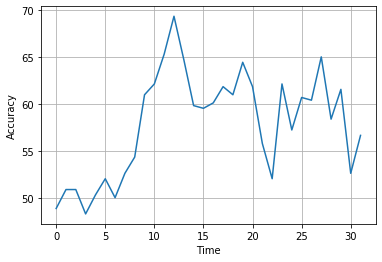

In [11]:
plt.figure()
plt.grid()
plt.xlabel('Time')
plt.ylabel('Accuracy')

plt.plot(accuracies)
plt.show()

## Multiclass classification of all 6 classes

### PCA and classification of data (5188x124) at each time stamp

In [5]:
accuracies = []
#print mat['X_3D'] :(124, 32, 5188)

X = mat['X_3D']
Y = mat['categoryLabels']

#print X.shape, y.shape

Y = Y.transpose()
X = X.transpose(1, 2, 0)

# print X.shape, Y.shape  #X: (32 - time , 5188, 124 - channels)
#print y

pca = PCA(0.95)

for j in range(X.shape[0]):   
    pca.fit(X[j,:,:])
    X_mod = pca.transform(X[j,:,:])
    data_X = []
    data_Y = Y-1
    
    for i in range(X.shape[1]):
        data_X.append(X[j,i,:])    
    
    sz = len(data_Y)
    data_X = np.array(data_X, dtype=np.float64)
    data_Y = np.array(data_Y, dtype=np.int64).reshape((sz,1))
    x_train, x_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size=0.2)

    trainY = np_utils.to_categorical(Y_train, 6)
    testY = np_utils.to_categorical(Y_test, 6)

    model=Sequential()
    model.add(Dense(64,input_shape=(124,),activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(6,activation='softmax'))

    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['categorical_accuracy'])
    history=model.fit(x_train,trainY,batch_size=64,epochs=10,verbose=1)
    model.summary()
    scores=model.evaluate(x_test,testY)

    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

    accuracies.append(scores[1]*100)

Train on 4150 samples
Epoch 1/10
4150/4150 [==============================] - 2s 480us/sample - loss: 1.7955 - categorical_accuracy: 0.1682
Epoch 2/10
4150/4150 [==============================] - 0s 50us/sample - loss: 1.7837 - categorical_accuracy: 0.1959
Epoch 3/10
4150/4150 [==============================] - 0s 96us/sample - loss: 1.7780 - categorical_accuracy: 0.2096
Epoch 4/10
4150/4150 [==============================] - 0s 81us/sample - loss: 1.7720 - categorical_accuracy: 0.2183
Epoch 5/10
4150/4150 [==============================] - 0s 107us/sample - loss: 1.7661 - categorical_accuracy: 0.2258
Epoch 6/10
4150/4150 [==============================] - 0s 93us/sample - loss: 1.7588 - categorical_accuracy: 0.2390s - loss: 1.7586 - categorical_accu
Epoch 7/10
4150/4150 [==============================] - 0s 61us/sample - loss: 1.7501 - categorical_accuracy: 0.2480
Epoch 8/10
4150/4150 [==============================] - 0s 57us/sample - loss: 1.7436 - categorical_accuracy: 0.2610
Epoch

categorical_accuracy: 15.90%
Train on 4150 samples
Epoch 1/10
4150/4150 [==============================] - 3s 755us/sample - loss: 1.7976 - categorical_accuracy: 0.1576
Epoch 2/10
4150/4150 [==============================] - 0s 75us/sample - loss: 1.7864 - categorical_accuracy: 0.1824
Epoch 3/10
4150/4150 [==============================] - 0s 91us/sample - loss: 1.7811 - categorical_accuracy: 0.1976
Epoch 4/10
4150/4150 [==============================] - 0s 98us/sample - loss: 1.7758 - categorical_accuracy: 0.2034
Epoch 5/10
4150/4150 [==============================] - 0s 70us/sample - loss: 1.7701 - categorical_accuracy: 0.2198
Epoch 6/10
4150/4150 [==============================] - 0s 52us/sample - loss: 1.7651 - categorical_accuracy: 0.2260
Epoch 7/10
4150/4150 [==============================] - 0s 49us/sample - loss: 1.7575 - categorical_accuracy: 0.2357
Epoch 8/10
4150/4150 [==============================] - 0s 69us/sample - loss: 1.7508 - categorical_accuracy: 0.2436
Epoch 9/10
4

categorical_accuracy: 15.80%
Train on 4150 samples
Epoch 1/10
4150/4150 [==============================] - 2s 365us/sample - loss: 1.7981 - categorical_accuracy: 0.1602
Epoch 2/10
4150/4150 [==============================] - 0s 45us/sample - loss: 1.7859 - categorical_accuracy: 0.1872s - loss: 1.7849 - categorical_accuracy: 
Epoch 3/10
4150/4150 [==============================] - 0s 45us/sample - loss: 1.7797 - categorical_accuracy: 0.2051
Epoch 4/10
4150/4150 [==============================] - 0s 44us/sample - loss: 1.7742 - categorical_accuracy: 0.2166
Epoch 5/10
4150/4150 [==============================] - 0s 77us/sample - loss: 1.7679 - categorical_accuracy: 0.2255
Epoch 6/10
4150/4150 [==============================] - 0s 61us/sample - loss: 1.7619 - categorical_accuracy: 0.2352
Epoch 7/10
4150/4150 [==============================] - 0s 50us/sample - loss: 1.7550 - categorical_accuracy: 0.2378
Epoch 8/10
4150/4150 [==============================] - 0s 50us/sample - loss: 1.7485 - 

categorical_accuracy: 14.16%
Train on 4150 samples
Epoch 1/10
4150/4150 [==============================] - 1s 197us/sample - loss: 1.7979 - categorical_accuracy: 0.1725
Epoch 2/10
4150/4150 [==============================] - 0s 36us/sample - loss: 1.7853 - categorical_accuracy: 0.1933
Epoch 3/10
4150/4150 [==============================] - 0s 41us/sample - loss: 1.7791 - categorical_accuracy: 0.2113
Epoch 4/10
4150/4150 [==============================] - 0s 43us/sample - loss: 1.7721 - categorical_accuracy: 0.2181
Epoch 5/10
4150/4150 [==============================] - 0s 38us/sample - loss: 1.7669 - categorical_accuracy: 0.2265
Epoch 6/10
4150/4150 [==============================] - 0s 35us/sample - loss: 1.7599 - categorical_accuracy: 0.2347
Epoch 7/10
4150/4150 [==============================] - 0s 38us/sample - loss: 1.7524 - categorical_accuracy: 0.2441
Epoch 8/10
4150/4150 [==============================] - 0s 56us/sample - loss: 1.7463 - categorical_accuracy: 0.2480
Epoch 9/10
4

categorical_accuracy: 18.40%
Train on 4150 samples
Epoch 1/10
4150/4150 [==============================] - 1s 244us/sample - loss: 1.7979 - categorical_accuracy: 0.1573
Epoch 2/10
4150/4150 [==============================] - 0s 31us/sample - loss: 1.7865 - categorical_accuracy: 0.1908
Epoch 3/10
4150/4150 [==============================] - 0s 31us/sample - loss: 1.7806 - categorical_accuracy: 0.2029
Epoch 4/10
4150/4150 [==============================] - 0s 30us/sample - loss: 1.7750 - categorical_accuracy: 0.2133
Epoch 5/10
4150/4150 [==============================] - 0s 44us/sample - loss: 1.7694 - categorical_accuracy: 0.2248
Epoch 6/10
4150/4150 [==============================] - 0s 40us/sample - loss: 1.7631 - categorical_accuracy: 0.2287
Epoch 7/10
4150/4150 [==============================] - 0s 30us/sample - loss: 1.7548 - categorical_accuracy: 0.2504
Epoch 8/10
4150/4150 [==============================] - 0s 41us/sample - loss: 1.7469 - categorical_accuracy: 0.2484s - loss: 1.7

categorical_accuracy: 16.28%
Train on 4150 samples
Epoch 1/10
4150/4150 [==============================] - 1s 221us/sample - loss: 1.7973 - categorical_accuracy: 0.1723
Epoch 2/10
4150/4150 [==============================] - 0s 45us/sample - loss: 1.7848 - categorical_accuracy: 0.1978
Epoch 3/10
4150/4150 [==============================] - 0s 45us/sample - loss: 1.7782 - categorical_accuracy: 0.2104
Epoch 4/10
4150/4150 [==============================] - 0s 53us/sample - loss: 1.7725 - categorical_accuracy: 0.2267
Epoch 5/10
4150/4150 [==============================] - 0s 49us/sample - loss: 1.7659 - categorical_accuracy: 0.2340
Epoch 6/10
4150/4150 [==============================] - 0s 47us/sample - loss: 1.7588 - categorical_accuracy: 0.2431
Epoch 7/10
4150/4150 [==============================] - 0s 49us/sample - loss: 1.7519 - categorical_accuracy: 0.2552
Epoch 8/10
4150/4150 [==============================] - 0s 59us/sample - loss: 1.7415 - categorical_accuracy: 0.2648
Epoch 9/10
4

categorical_accuracy: 17.44%
Train on 4150 samples
Epoch 1/10
4150/4150 [==============================] - 1s 243us/sample - loss: 1.7941 - categorical_accuracy: 0.1658
Epoch 2/10
4150/4150 [==============================] - 0s 48us/sample - loss: 1.7813 - categorical_accuracy: 0.2053
Epoch 3/10
4150/4150 [==============================] - 0s 40us/sample - loss: 1.7729 - categorical_accuracy: 0.2154
Epoch 4/10
4150/4150 [==============================] - 0s 48us/sample - loss: 1.7674 - categorical_accuracy: 0.2207
Epoch 5/10
4150/4150 [==============================] - 0s 43us/sample - loss: 1.7593 - categorical_accuracy: 0.2325
Epoch 6/10
4150/4150 [==============================] - 0s 38us/sample - loss: 1.7519 - categorical_accuracy: 0.2376
Epoch 7/10
4150/4150 [==============================] - 0s 35us/sample - loss: 1.7424 - categorical_accuracy: 0.2499
Epoch 8/10
4150/4150 [==============================] - 0s 40us/sample - loss: 1.7341 - categorical_accuracy: 0.2552
Epoch 9/10
4

categorical_accuracy: 17.24%
Train on 4150 samples
Epoch 1/10
4150/4150 [==============================] - 1s 285us/sample - loss: 1.7936 - categorical_accuracy: 0.1699
Epoch 2/10
4150/4150 [==============================] - 0s 53us/sample - loss: 1.7787 - categorical_accuracy: 0.2002
Epoch 3/10
4150/4150 [==============================] - 0s 53us/sample - loss: 1.7693 - categorical_accuracy: 0.2227
Epoch 4/10
4150/4150 [==============================] - 0s 45us/sample - loss: 1.7628 - categorical_accuracy: 0.2236
Epoch 5/10
4150/4150 [==============================] - 0s 54us/sample - loss: 1.7560 - categorical_accuracy: 0.2371
Epoch 6/10
4150/4150 [==============================] - 0s 54us/sample - loss: 1.7474 - categorical_accuracy: 0.2412
Epoch 7/10
4150/4150 [==============================] - 0s 46us/sample - loss: 1.7380 - categorical_accuracy: 0.2561
Epoch 8/10
4150/4150 [==============================] - 0s 52us/sample - loss: 1.7293 - categorical_accuracy: 0.2658
Epoch 9/10
4

categorical_accuracy: 18.02%
Train on 4150 samples
Epoch 1/10
4150/4150 [==============================] - 3s 704us/sample - loss: 1.7925 - categorical_accuracy: 0.1776
Epoch 2/10
4150/4150 [==============================] - 0s 74us/sample - loss: 1.7765 - categorical_accuracy: 0.2072
Epoch 3/10
4150/4150 [==============================] - 0s 85us/sample - loss: 1.7646 - categorical_accuracy: 0.2304
Epoch 4/10
4150/4150 [==============================] - 1s 144us/sample - loss: 1.7553 - categorical_accuracy: 0.2313
Epoch 5/10
4150/4150 [==============================] - 0s 113us/sample - loss: 1.7399 - categorical_accuracy: 0.2463
Epoch 6/10
4150/4150 [==============================] - 0s 72us/sample - loss: 1.7304 - categorical_accuracy: 0.2571
Epoch 7/10
4150/4150 [==============================] - 0s 54us/sample - loss: 1.7184 - categorical_accuracy: 0.2622
Epoch 8/10
4150/4150 [==============================] - 0s 69us/sample - loss: 1.7057 - categorical_accuracy: 0.2769s - loss: 1

categorical_accuracy: 18.59%
Train on 4150 samples
Epoch 1/10
4150/4150 [==============================] - 1s 306us/sample - loss: 1.7842 - categorical_accuracy: 0.1896
Epoch 2/10
4150/4150 [==============================] - 0s 61us/sample - loss: 1.7570 - categorical_accuracy: 0.2308
Epoch 3/10
4150/4150 [==============================] - 0s 56us/sample - loss: 1.7397 - categorical_accuracy: 0.2484
Epoch 4/10
4150/4150 [==============================] - 0s 54us/sample - loss: 1.7236 - categorical_accuracy: 0.2634s - loss: 1.7192 - categorical_accuracy
Epoch 5/10
4150/4150 [==============================] - 0s 65us/sample - loss: 1.7110 - categorical_accuracy: 0.2687s - loss: 1.7051 - categorical_accuracy: 
Epoch 6/10
4150/4150 [==============================] - 0s 59us/sample - loss: 1.7008 - categorical_accuracy: 0.2807
Epoch 7/10
4150/4150 [==============================] - 0s 61us/sample - loss: 1.6897 - categorical_accuracy: 0.2973
Epoch 8/10
4150/4150 [===========================

categorical_accuracy: 25.92%
Train on 4150 samples
Epoch 1/10
4150/4150 [==============================] - 1s 250us/sample - loss: 1.7753 - categorical_accuracy: 0.2053
Epoch 2/10
4150/4150 [==============================] - 0s 49us/sample - loss: 1.7478 - categorical_accuracy: 0.2417
Epoch 3/10
4150/4150 [==============================] - 0s 46us/sample - loss: 1.7326 - categorical_accuracy: 0.2528
Epoch 4/10
4150/4150 [==============================] - 0s 35us/sample - loss: 1.7178 - categorical_accuracy: 0.2689
Epoch 5/10
4150/4150 [==============================] - 0s 56us/sample - loss: 1.7057 - categorical_accuracy: 0.2749
Epoch 6/10
4150/4150 [==============================] - 0s 59us/sample - loss: 1.6949 - categorical_accuracy: 0.2872
Epoch 7/10
4150/4150 [==============================] - 0s 61us/sample - loss: 1.6825 - categorical_accuracy: 0.2933
Epoch 8/10
4150/4150 [==============================] - 0s 56us/sample - loss: 1.6703 - categorical_accuracy: 0.3053
Epoch 9/10
4

categorical_accuracy: 26.11%
Train on 4150 samples
Epoch 1/10
4150/4150 [==============================] - 1s 309us/sample - loss: 1.7847 - categorical_accuracy: 0.1947
Epoch 2/10
4150/4150 [==============================] - 0s 40us/sample - loss: 1.7606 - categorical_accuracy: 0.2342
Epoch 3/10
4150/4150 [==============================] - 0s 49us/sample - loss: 1.7459 - categorical_accuracy: 0.2508
Epoch 4/10
4150/4150 [==============================] - 0s 61us/sample - loss: 1.7312 - categorical_accuracy: 0.2605
Epoch 5/10
4150/4150 [==============================] - 0s 70us/sample - loss: 1.7194 - categorical_accuracy: 0.2677
Epoch 6/10
4150/4150 [==============================] - 0s 55us/sample - loss: 1.7071 - categorical_accuracy: 0.2795
Epoch 7/10
4150/4150 [==============================] - 0s 56us/sample - loss: 1.6923 - categorical_accuracy: 0.2892
Epoch 8/10
4150/4150 [==============================] - 0s 47us/sample - loss: 1.6833 - categorical_accuracy: 0.2971
Epoch 9/10
4

categorical_accuracy: 25.34%
Train on 4150 samples
Epoch 1/10
4150/4150 [==============================] - 2s 486us/sample - loss: 1.7809 - categorical_accuracy: 0.2046
Epoch 2/10
4150/4150 [==============================] - 0s 43us/sample - loss: 1.7490 - categorical_accuracy: 0.2427
Epoch 3/10
4150/4150 [==============================] - 0s 49us/sample - loss: 1.7278 - categorical_accuracy: 0.2617
Epoch 4/10
4150/4150 [==============================] - 0s 49us/sample - loss: 1.7067 - categorical_accuracy: 0.2846
Epoch 5/10
4150/4150 [==============================] - 0s 44us/sample - loss: 1.6868 - categorical_accuracy: 0.2959
Epoch 6/10
4150/4150 [==============================] - 0s 48us/sample - loss: 1.6687 - categorical_accuracy: 0.3082
Epoch 7/10
4150/4150 [==============================] - 0s 46us/sample - loss: 1.6532 - categorical_accuracy: 0.3140
Epoch 8/10
4150/4150 [==============================] - 0s 44us/sample - loss: 1.6408 - categorical_accuracy: 0.3205
Epoch 9/10
4

categorical_accuracy: 28.32%
Train on 4150 samples
Epoch 1/10
4150/4150 [==============================] - 1s 321us/sample - loss: 1.7811 - categorical_accuracy: 0.2096
Epoch 2/10
4150/4150 [==============================] - 0s 44us/sample - loss: 1.7573 - categorical_accuracy: 0.2369
Epoch 3/10
4150/4150 [==============================] - 0s 49us/sample - loss: 1.7388 - categorical_accuracy: 0.2581
Epoch 4/10
4150/4150 [==============================] - 0s 44us/sample - loss: 1.7227 - categorical_accuracy: 0.2684
Epoch 5/10
4150/4150 [==============================] - 0s 36us/sample - loss: 1.7028 - categorical_accuracy: 0.2829
Epoch 6/10
4150/4150 [==============================] - 0s 34us/sample - loss: 1.6892 - categorical_accuracy: 0.2952
Epoch 7/10
4150/4150 [==============================] - 0s 48us/sample - loss: 1.6779 - categorical_accuracy: 0.2916
Epoch 8/10
4150/4150 [==============================] - 0s 43us/sample - loss: 1.6627 - categorical_accuracy: 0.3082
Epoch 9/10
4

categorical_accuracy: 26.49%
Train on 4150 samples
Epoch 1/10
4150/4150 [==============================] - 1s 270us/sample - loss: 1.7808 - categorical_accuracy: 0.2034
Epoch 2/10
4150/4150 [==============================] - 0s 44us/sample - loss: 1.7597 - categorical_accuracy: 0.2342
Epoch 3/10
4150/4150 [==============================] - 0s 41us/sample - loss: 1.7457 - categorical_accuracy: 0.2506
Epoch 4/10
4150/4150 [==============================] - 0s 55us/sample - loss: 1.7304 - categorical_accuracy: 0.2612
Epoch 5/10
4150/4150 [==============================] - 0s 38us/sample - loss: 1.7164 - categorical_accuracy: 0.2704
Epoch 6/10
4150/4150 [==============================] - 0s 58us/sample - loss: 1.7035 - categorical_accuracy: 0.2884
Epoch 7/10
4150/4150 [==============================] - 0s 55us/sample - loss: 1.6888 - categorical_accuracy: 0.2937
Epoch 8/10
4150/4150 [==============================] - 0s 55us/sample - loss: 1.6764 - categorical_accuracy: 0.3048
Epoch 9/10
4

categorical_accuracy: 29.67%
Train on 4150 samples
Epoch 1/10
4150/4150 [==============================] - 1s 195us/sample - loss: 1.7899 - categorical_accuracy: 0.1817
Epoch 2/10
4150/4150 [==============================] - 0s 47us/sample - loss: 1.7672 - categorical_accuracy: 0.2306
Epoch 3/10
4150/4150 [==============================] - 0s 80us/sample - loss: 1.7523 - categorical_accuracy: 0.2400
Epoch 4/10
4150/4150 [==============================] - 0s 59us/sample - loss: 1.7387 - categorical_accuracy: 0.2624
Epoch 5/10
4150/4150 [==============================] - 0s 56us/sample - loss: 1.7237 - categorical_accuracy: 0.2810
Epoch 6/10
4150/4150 [==============================] - 0s 66us/sample - loss: 1.7103 - categorical_accuracy: 0.2819
Epoch 7/10
4150/4150 [==============================] - 0s 55us/sample - loss: 1.6995 - categorical_accuracy: 0.2892
Epoch 8/10
4150/4150 [==============================] - 0s 46us/sample - loss: 1.6837 - categorical_accuracy: 0.3017
Epoch 9/10
4

categorical_accuracy: 26.59%
Train on 4150 samples
Epoch 1/10
4150/4150 [==============================] - 1s 358us/sample - loss: 1.7835 - categorical_accuracy: 0.1906
Epoch 2/10
4150/4150 [==============================] - 0s 59us/sample - loss: 1.7594 - categorical_accuracy: 0.2410
Epoch 3/10
4150/4150 [==============================] - 0s 50us/sample - loss: 1.7405 - categorical_accuracy: 0.2482
Epoch 4/10
4150/4150 [==============================] - 0s 63us/sample - loss: 1.7221 - categorical_accuracy: 0.2723
Epoch 5/10
4150/4150 [==============================] - 0s 92us/sample - loss: 1.7083 - categorical_accuracy: 0.2737
Epoch 6/10
4150/4150 [==============================] - 0s 59us/sample - loss: 1.6951 - categorical_accuracy: 0.2788
Epoch 7/10
4150/4150 [==============================] - 0s 69us/sample - loss: 1.6792 - categorical_accuracy: 0.2961
Epoch 8/10
4150/4150 [==============================] - 0s 46us/sample - loss: 1.6691 - categorical_accuracy: 0.3051
Epoch 9/10
4

categorical_accuracy: 24.28%
Train on 4150 samples
Epoch 1/10
4150/4150 [==============================] - 1s 323us/sample - loss: 1.7817 - categorical_accuracy: 0.1976
Epoch 2/10
4150/4150 [==============================] - 0s 50us/sample - loss: 1.7545 - categorical_accuracy: 0.2378
Epoch 3/10
4150/4150 [==============================] - 0s 43us/sample - loss: 1.7354 - categorical_accuracy: 0.2607
Epoch 4/10
4150/4150 [==============================] - 0s 47us/sample - loss: 1.7199 - categorical_accuracy: 0.2696
Epoch 5/10
4150/4150 [==============================] - 0s 49us/sample - loss: 1.7065 - categorical_accuracy: 0.2752
Epoch 6/10
4150/4150 [==============================] - 0s 47us/sample - loss: 1.6943 - categorical_accuracy: 0.2925
Epoch 7/10
4150/4150 [==============================] - 0s 48us/sample - loss: 1.6844 - categorical_accuracy: 0.2933
Epoch 8/10
4150/4150 [==============================] - 0s 59us/sample - loss: 1.6702 - categorical_accuracy: 0.3048
Epoch 9/10
4

categorical_accuracy: 24.57%
Train on 4150 samples
Epoch 1/10
4150/4150 [==============================] - 1s 313us/sample - loss: 1.7790 - categorical_accuracy: 0.2142
Epoch 2/10
4150/4150 [==============================] - 0s 55us/sample - loss: 1.7523 - categorical_accuracy: 0.2366
Epoch 3/10
4150/4150 [==============================] - 0s 53us/sample - loss: 1.7323 - categorical_accuracy: 0.2552
Epoch 4/10
4150/4150 [==============================] - 0s 51us/sample - loss: 1.7173 - categorical_accuracy: 0.2687
Epoch 5/10
4150/4150 [==============================] - 0s 118us/sample - loss: 1.7018 - categorical_accuracy: 0.2773
Epoch 6/10
4150/4150 [==============================] - 0s 77us/sample - loss: 1.6917 - categorical_accuracy: 0.2872
Epoch 7/10
4150/4150 [==============================] - 0s 69us/sample - loss: 1.6780 - categorical_accuracy: 0.3022
Epoch 8/10
4150/4150 [==============================] - 0s 64us/sample - loss: 1.6663 - categorical_accuracy: 0.3024
Epoch 9/10


categorical_accuracy: 23.12%
Train on 4150 samples
Epoch 1/10
4150/4150 [==============================] - 1s 323us/sample - loss: 1.7804 - categorical_accuracy: 0.2048
Epoch 2/10
4150/4150 [==============================] - 0s 55us/sample - loss: 1.7552 - categorical_accuracy: 0.2405
Epoch 3/10
4150/4150 [==============================] - 0s 38us/sample - loss: 1.7377 - categorical_accuracy: 0.2569
Epoch 4/10
4150/4150 [==============================] - 0s 40us/sample - loss: 1.7194 - categorical_accuracy: 0.2728
Epoch 5/10
4150/4150 [==============================] - 0s 40us/sample - loss: 1.7055 - categorical_accuracy: 0.2773
Epoch 6/10
4150/4150 [==============================] - 0s 36us/sample - loss: 1.6939 - categorical_accuracy: 0.2870
Epoch 7/10
4150/4150 [==============================] - 0s 40us/sample - loss: 1.6794 - categorical_accuracy: 0.2925
Epoch 8/10
4150/4150 [==============================] - 0s 37us/sample - loss: 1.6675 - categorical_accuracy: 0.3022
Epoch 9/10
4

categorical_accuracy: 23.80%
Train on 4150 samples
Epoch 1/10
4150/4150 [==============================] - 1s 261us/sample - loss: 1.7881 - categorical_accuracy: 0.1824
Epoch 2/10
4150/4150 [==============================] - 0s 36us/sample - loss: 1.7664 - categorical_accuracy: 0.2383
Epoch 3/10
4150/4150 [==============================] - 0s 36us/sample - loss: 1.7494 - categorical_accuracy: 0.2477
Epoch 4/10
4150/4150 [==============================] - ETA: 0s - loss: 1.7320 - categorical_accuracy: 0.26 - 0s 59us/sample - loss: 1.7348 - categorical_accuracy: 0.2651
Epoch 5/10
4150/4150 [==============================] - 0s 50us/sample - loss: 1.7206 - categorical_accuracy: 0.2749
Epoch 6/10
4150/4150 [==============================] - 0s 53us/sample - loss: 1.7105 - categorical_accuracy: 0.2783
Epoch 7/10
4150/4150 [==============================] - 0s 50us/sample - loss: 1.6984 - categorical_accuracy: 0.2827
Epoch 8/10
4150/4150 [==============================] - 0s 56us/sample - lo

categorical_accuracy: 24.37%
Train on 4150 samples
Epoch 1/10
4150/4150 [==============================] - 1s 296us/sample - loss: 1.7872 - categorical_accuracy: 0.1899
Epoch 2/10
4150/4150 [==============================] - 0s 38us/sample - loss: 1.7694 - categorical_accuracy: 0.2212
Epoch 3/10
4150/4150 [==============================] - 0s 37us/sample - loss: 1.7577 - categorical_accuracy: 0.2383
Epoch 4/10
4150/4150 [==============================] - 0s 44us/sample - loss: 1.7474 - categorical_accuracy: 0.2463
Epoch 5/10
4150/4150 [==============================] - 0s 48us/sample - loss: 1.7359 - categorical_accuracy: 0.2571s - loss: 1.7350 - categorical_accuracy: 0.25
Epoch 6/10
4150/4150 [==============================] - 0s 45us/sample - loss: 1.7233 - categorical_accuracy: 0.2634
Epoch 7/10
4150/4150 [==============================] - 0s 44us/sample - loss: 1.7155 - categorical_accuracy: 0.2747
Epoch 8/10
4150/4150 [==============================] - 0s 45us/sample - loss: 1.702

categorical_accuracy: 20.81%
Train on 4150 samples
Epoch 1/10
4150/4150 [==============================] - 1s 202us/sample - loss: 1.7918 - categorical_accuracy: 0.1904
Epoch 2/10
4150/4150 [==============================] - 0s 34us/sample - loss: 1.7766 - categorical_accuracy: 0.2205
Epoch 3/10
4150/4150 [==============================] - 0s 34us/sample - loss: 1.7647 - categorical_accuracy: 0.2357
Epoch 4/10
4150/4150 [==============================] - 0s 35us/sample - loss: 1.7530 - categorical_accuracy: 0.2516
Epoch 5/10
4150/4150 [==============================] - 0s 37us/sample - loss: 1.7393 - categorical_accuracy: 0.2655
Epoch 6/10
4150/4150 [==============================] - 0s 34us/sample - loss: 1.7297 - categorical_accuracy: 0.2619
Epoch 7/10
4150/4150 [==============================] - 0s 41us/sample - loss: 1.7170 - categorical_accuracy: 0.2749
Epoch 8/10
4150/4150 [==============================] - 0s 45us/sample - loss: 1.7054 - categorical_accuracy: 0.2920
Epoch 9/10
4

categorical_accuracy: 22.16%
Train on 4150 samples
Epoch 1/10
4150/4150 [==============================] - 1s 299us/sample - loss: 1.7915 - categorical_accuracy: 0.1812
Epoch 2/10
4150/4150 [==============================] - 0s 73us/sample - loss: 1.7771 - categorical_accuracy: 0.2108
Epoch 3/10
4150/4150 [==============================] - 0s 59us/sample - loss: 1.7660 - categorical_accuracy: 0.2255
Epoch 4/10
4150/4150 [==============================] - 0s 97us/sample - loss: 1.7544 - categorical_accuracy: 0.2407
Epoch 5/10
4150/4150 [==============================] - 0s 81us/sample - loss: 1.7435 - categorical_accuracy: 0.2528
Epoch 6/10
4150/4150 [==============================] - 0s 56us/sample - loss: 1.7333 - categorical_accuracy: 0.2619
Epoch 7/10
4150/4150 [==============================] - 0s 57us/sample - loss: 1.7220 - categorical_accuracy: 0.2701
Epoch 8/10
4150/4150 [==============================] - 0s 69us/sample - loss: 1.7126 - categorical_accuracy: 0.2807
Epoch 9/10
4

categorical_accuracy: 21.10%
Train on 4150 samples
Epoch 1/10
4150/4150 [==============================] - 2s 476us/sample - loss: 1.7923 - categorical_accuracy: 0.1713
Epoch 2/10
4150/4150 [==============================] - 0s 88us/sample - loss: 1.7781 - categorical_accuracy: 0.2123
Epoch 3/10
4150/4150 [==============================] - 0s 67us/sample - loss: 1.7679 - categorical_accuracy: 0.2239
Epoch 4/10
4150/4150 [==============================] - 0s 65us/sample - loss: 1.7578 - categorical_accuracy: 0.2335
Epoch 5/10
4150/4150 [==============================] - 0s 62us/sample - loss: 1.7465 - categorical_accuracy: 0.2480
Epoch 6/10
4150/4150 [==============================] - 0s 73us/sample - loss: 1.7347 - categorical_accuracy: 0.2576
Epoch 7/10
4150/4150 [==============================] - 0s 78us/sample - loss: 1.7227 - categorical_accuracy: 0.2687
Epoch 8/10
4150/4150 [==============================] - 0s 59us/sample - loss: 1.7102 - categorical_accuracy: 0.2790
Epoch 9/10
4

categorical_accuracy: 21.19%
Train on 4150 samples
Epoch 1/10
4150/4150 [==============================] - 3s 707us/sample - loss: 1.7893 - categorical_accuracy: 0.1819
Epoch 2/10
4150/4150 [==============================] - 0s 78us/sample - loss: 1.7735 - categorical_accuracy: 0.2188
Epoch 3/10
4150/4150 [==============================] - 0s 67us/sample - loss: 1.7614 - categorical_accuracy: 0.2376
Epoch 4/10
4150/4150 [==============================] - 0s 80us/sample - loss: 1.7501 - categorical_accuracy: 0.2395
Epoch 5/10
4150/4150 [==============================] - 0s 50us/sample - loss: 1.7377 - categorical_accuracy: 0.2564
Epoch 6/10
4150/4150 [==============================] - 0s 60us/sample - loss: 1.7276 - categorical_accuracy: 0.2653
Epoch 7/10
4150/4150 [==============================] - 0s 73us/sample - loss: 1.7161 - categorical_accuracy: 0.2713
Epoch 8/10
4150/4150 [==============================] - 0s 69us/sample - loss: 1.7033 - categorical_accuracy: 0.2839
Epoch 9/10
4

categorical_accuracy: 20.91%
Train on 4150 samples
Epoch 1/10
4150/4150 [==============================] - 2s 392us/sample - loss: 1.7907 - categorical_accuracy: 0.1834
Epoch 2/10
4150/4150 [==============================] - 0s 48us/sample - loss: 1.7725 - categorical_accuracy: 0.2183
Epoch 3/10
4150/4150 [==============================] - 0s 56us/sample - loss: 1.7599 - categorical_accuracy: 0.2316
Epoch 4/10
4150/4150 [==============================] - 0s 68us/sample - loss: 1.7474 - categorical_accuracy: 0.2465
Epoch 5/10
4150/4150 [==============================] - 0s 68us/sample - loss: 1.7341 - categorical_accuracy: 0.2566
Epoch 6/10
4150/4150 [==============================] - 0s 51us/sample - loss: 1.7217 - categorical_accuracy: 0.2689
Epoch 7/10
4150/4150 [==============================] - 0s 65us/sample - loss: 1.7098 - categorical_accuracy: 0.2819
Epoch 8/10
4150/4150 [==============================] - 0s 53us/sample - loss: 1.6990 - categorical_accuracy: 0.2802
Epoch 9/10
4

categorical_accuracy: 24.37%
Train on 4150 samples
Epoch 1/10
4150/4150 [==============================] - 3s 750us/sample - loss: 1.7895 - categorical_accuracy: 0.1896
Epoch 2/10
4150/4150 [==============================] - 0s 112us/sample - loss: 1.7700 - categorical_accuracy: 0.2227
Epoch 3/10
4150/4150 [==============================] - 0s 91us/sample - loss: 1.7583 - categorical_accuracy: 0.2349
Epoch 4/10
4150/4150 [==============================] - 0s 113us/sample - loss: 1.7475 - categorical_accuracy: 0.2398
Epoch 5/10
4150/4150 [==============================] - 1s 152us/sample - loss: 1.7359 - categorical_accuracy: 0.2583
Epoch 6/10
4150/4150 [==============================] - 0s 119us/sample - loss: 1.7265 - categorical_accuracy: 0.2643
Epoch 7/10
4150/4150 [==============================] - 1s 123us/sample - loss: 1.7159 - categorical_accuracy: 0.2747 - loss: 1.7102 - categorical_accura
Epoch 8/10
4150/4150 [==============================] - 0s 103us/sample - loss: 1.7033 -

categorical_accuracy: 23.70%
Train on 4150 samples
Epoch 1/10
4150/4150 [==============================] - 2s 515us/sample - loss: 1.7888 - categorical_accuracy: 0.1822
Epoch 2/10
4150/4150 [==============================] - 0s 107us/sample - loss: 1.7712 - categorical_accuracy: 0.2222
Epoch 3/10
4150/4150 [==============================] - 0s 83us/sample - loss: 1.7595 - categorical_accuracy: 0.2308
Epoch 4/10
4150/4150 [==============================] - 0s 65us/sample - loss: 1.7486 - categorical_accuracy: 0.2451
Epoch 5/10
4150/4150 [==============================] - 0s 46us/sample - loss: 1.7343 - categorical_accuracy: 0.2629
Epoch 6/10
4150/4150 [==============================] - 0s 58us/sample - loss: 1.7252 - categorical_accuracy: 0.2682
Epoch 7/10
4150/4150 [==============================] - 0s 59us/sample - loss: 1.7135 - categorical_accuracy: 0.2761
Epoch 8/10
4150/4150 [==============================] - 0s 49us/sample - loss: 1.7014 - categorical_accuracy: 0.2827
Epoch 9/10


categorical_accuracy: 22.35%
Train on 4150 samples
Epoch 1/10
4150/4150 [==============================] - 2s 463us/sample - loss: 1.7925 - categorical_accuracy: 0.1884
Epoch 2/10
4150/4150 [==============================] - 0s 59us/sample - loss: 1.7728 - categorical_accuracy: 0.2188
Epoch 3/10
4150/4150 [==============================] - 0s 109us/sample - loss: 1.7609 - categorical_accuracy: 0.2311
Epoch 4/10
4150/4150 [==============================] - 0s 106us/sample - loss: 1.7504 - categorical_accuracy: 0.2390
Epoch 5/10
4150/4150 [==============================] - 0s 64us/sample - loss: 1.7397 - categorical_accuracy: 0.2465
Epoch 6/10
4150/4150 [==============================] - 0s 79us/sample - loss: 1.7290 - categorical_accuracy: 0.2646
Epoch 7/10
4150/4150 [==============================] - 0s 65us/sample - loss: 1.7183 - categorical_accuracy: 0.2694
Epoch 8/10
4150/4150 [==============================] - 0s 63us/sample - loss: 1.7078 - categorical_accuracy: 0.2834
Epoch 9/10

categorical_accuracy: 22.64%
Train on 4150 samples
Epoch 1/10
4150/4150 [==============================] - 1s 241us/sample - loss: 1.7880 - categorical_accuracy: 0.1863
Epoch 2/10
4150/4150 [==============================] - 0s 38us/sample - loss: 1.7722 - categorical_accuracy: 0.2173
Epoch 3/10
4150/4150 [==============================] - 0s 45us/sample - loss: 1.7614 - categorical_accuracy: 0.2311
Epoch 4/10
4150/4150 [==============================] - 0s 51us/sample - loss: 1.7536 - categorical_accuracy: 0.2422
Epoch 5/10
4150/4150 [==============================] - 0s 41us/sample - loss: 1.7433 - categorical_accuracy: 0.2559
Epoch 6/10
4150/4150 [==============================] - 0s 45us/sample - loss: 1.7342 - categorical_accuracy: 0.2622
Epoch 7/10
4150/4150 [==============================] - 0s 47us/sample - loss: 1.7253 - categorical_accuracy: 0.2670
Epoch 8/10
4150/4150 [==============================] - 0s 46us/sample - loss: 1.7128 - categorical_accuracy: 0.2848
Epoch 9/10
4

categorical_accuracy: 19.56%
Train on 4150 samples
Epoch 1/10
4150/4150 [==============================] - 1s 190us/sample - loss: 1.7906 - categorical_accuracy: 0.1795
Epoch 2/10
4150/4150 [==============================] - 0s 48us/sample - loss: 1.7739 - categorical_accuracy: 0.2188
Epoch 3/10
4150/4150 [==============================] - 0s 51us/sample - loss: 1.7638 - categorical_accuracy: 0.2270
Epoch 4/10
4150/4150 [==============================] - 0s 54us/sample - loss: 1.7546 - categorical_accuracy: 0.2359
Epoch 5/10
4150/4150 [==============================] - 0s 50us/sample - loss: 1.7464 - categorical_accuracy: 0.2386
Epoch 6/10
4150/4150 [==============================] - 0s 55us/sample - loss: 1.7371 - categorical_accuracy: 0.2566
Epoch 7/10
4150/4150 [==============================] - 0s 43us/sample - loss: 1.7287 - categorical_accuracy: 0.2670
Epoch 8/10
4150/4150 [==============================] - 0s 55us/sample - loss: 1.7190 - categorical_accuracy: 0.2752
Epoch 9/10
4

categorical_accuracy: 19.65%


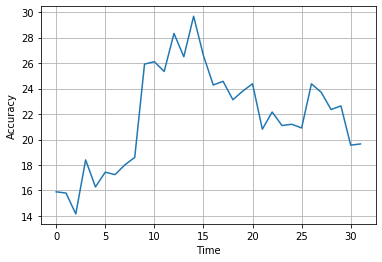

In [8]:
plt.xlabel('Time')
plt.grid()
plt.ylabel('Accuracy')

plt.plot(accuracies)
plt.show()